In [2]:
import pandas as pd



In [3]:
# Load datasets
sentiment_df = pd.read_csv("fear_greed_index.csv")  
trades_df = pd.read_csv("historical_data.csv")



In [6]:
#preprocessing of sentiment 
# Convert timestamp to datetime
sentiment_df['timestamp'] = pd.to_datetime(sentiment_df['timestamp'])
sentiment_df['date'] = pd.to_datetime(sentiment_df['date']).dt.date


In [9]:
#preprocessing of trades 
trades_df['Timestamp IST'] = pd.to_datetime(trades_df['Timestamp IST'], format="%d-%m-%Y %H:%M", dayfirst=True)
trades_df['date'] = trades_df['Timestamp IST'].dt.date


In [10]:
#check consistency : 

print(sentiment_df.columns)
print(trades_df.columns)

Index(['timestamp', 'value', 'classification', 'date'], dtype='object')
Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp', 'date'],
      dtype='object')


In [11]:
#merge then by date 
# Select only needed columns from sentiment
sentiment_df = sentiment_df[['date', 'classification']]

# Merge trader data with sentiment classification on date
merged_df = pd.merge(trades_df, sentiment_df, on='date', how='left')


In [14]:
#cleaining and converting columns 
# Ensure PnL and leverage are numeric
merged_df['Closed PnL'] = pd.to_numeric(merged_df['Closed PnL'], errors='coerce')
merged_df['Fee'] = pd.to_numeric(merged_df['Fee'], errors='coerce')
merged_df['Size USD'] = pd.to_numeric(merged_df['Size USD'], errors='coerce')

# Drop rows where classification is missing (if any)
merged_df = merged_df.dropna(subset=['classification'])


In [17]:
#analuze metrics by sentiment 
# Group by Fear/Greed classification
summary = merged_df.groupby('classification').agg({
    'Closed PnL': ['mean', 'sum'],
    'Fee': 'mean',
    'Account': pd.Series.nunique,
    'Size USD': 'mean'
}).rename(columns={'Account': 'unique_accounts'})

print(summary)


               Closed PnL                     Fee unique_accounts     Size USD
                     mean           sum      mean         nunique         mean
classification                                                                
Extreme Fear    34.537862  7.391102e+05  1.116291              32  5349.731843
Extreme Greed   67.892861  2.715171e+06  0.675902              30  3112.251565
Fear            54.290400  3.357155e+06  1.495172              32  7816.109931
Greed           42.743559  2.150129e+06  1.254372              31  5736.884375
Neutral         34.307718  1.292921e+06  1.044798              31  4782.732661


In [19]:
#visualize the resuls 
import seaborn as sns
import matplotlib.pyplot as plt



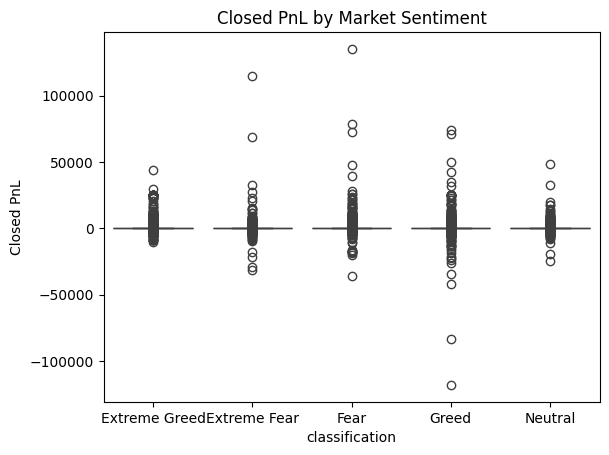

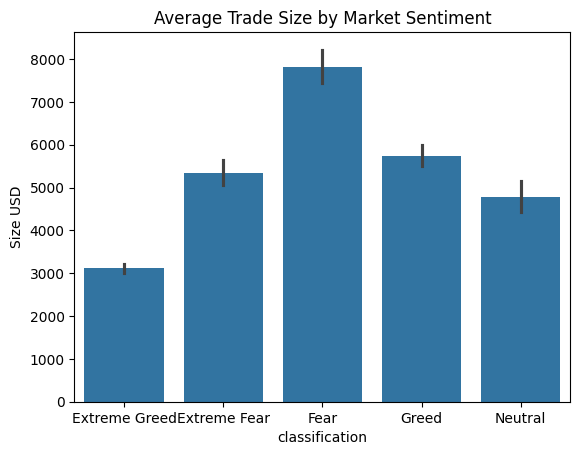

In [24]:
# Boxplot: PnL distribution
sns.boxplot(data=merged_df, x='classification', y='Closed PnL')
plt.title("Closed PnL by Market Sentiment")
plt.show()

# Barplot: Average Trade Size
sns.barplot(data=merged_df, x='classification', y='Size USD')
plt.title("Average Trade Size by Market Sentiment")
plt.show()

# Countplot: Number of Trades per Classification


<Axes: xlabel='classification', ylabel='Size USD'>

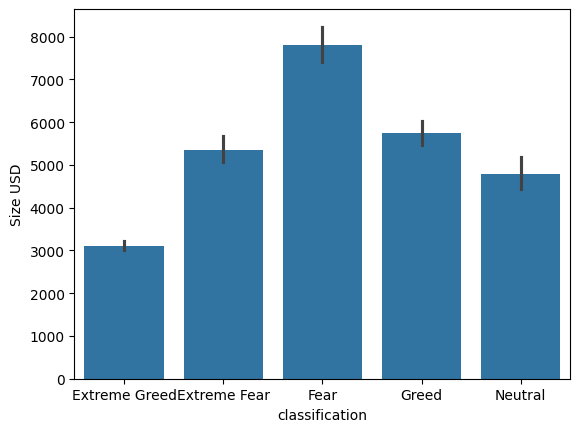

In [22]:
# Countplot: Number of Trades per Classification
sns.barplot(data=merged_df, x='classification', y='Size USD') 
